# Data Mining - Project 2

#### Members: 
Vasiliki Efstathiou

Nikos Eftychiou

In [ ]:
# load my-drive 

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# unzip data.zip

import os
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/data-mining/project-2/data.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

### Data Analyse - Exercise 1

1.1)

In [ ]:
# create dataframes

import pandas as pd

df_train = pd.read_csv('./data/train.csv')

df_target = pd.read_csv('./data/target.csv')

df_test = pd.read_csv('./data/test.csv')

df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.166915e+06,1.166915e+06,1.166915e+06,1.166915e+06,1.166915e+06,1.166915e+06,1.166915e+06
mean,1.534915e+00,1.665292e+00,-7.397346e+01,4.075089e+01,-7.397340e+01,4.075182e+01,9.584392e+02
std,4.987797e-01,1.314746e+00,6.231408e-02,3.173031e-02,6.157028e-02,3.645646e-02,5.334345e+03
min,1.000000e+00,0.000000e+00,-1.219332e+02,3.435970e+01,-1.219332e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399186e+01,4.073731e+01,-7.399133e+01,4.073591e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398175e+01,4.075407e+01,-7.397977e+01,4.075453e+01,6.630000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076834e+01,-7.396303e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,4.437194e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
import pandas as pd
import numpy as np

df_desc = df_train['trip_duration'].describe()
mean = df_desc['mean']                      # get average trip duration
std = df_desc['std']                        # get standard deviation

df_train = df_train[(df_train['trip_duration'] < (mean + 2*std))] # remove extreme values

1.2)

In [ ]:
# exercise 1.2

import numpy as np

df_train = df_train[np.logical_and((df_train['pickup_longitude'] >= -74.03), (df_train['pickup_longitude'] <= -73.75))]

df_train = df_train[np.logical_and((df_train['dropoff_longitude'] >= -74.03), (df_train['dropoff_longitude'] <= -73.75))]

df_train = df_train[np.logical_and((df_train['pickup_latitude'] >= 40.63), (df_train['pickup_latitude'] <= 40.85))]

df_train = df_train[np.logical_and((df_train['dropoff_latitude'] >= 40.63), (df_train['dropoff_latitude'] <= 40.85))]

1.3)

In [ ]:
# helper functions

d = {'December' : 'winter', 'January' : 'winter', 'February' : 'winter', 'March' : 'spring' ,'April' : 'spring', 'May' : 'spring', 'June' : 'summer',
            'July' : 'summer','August' : 'summer', 'September' : 'autumn', 'October' : 'autumn', 'November' : 'autumn'}


e = {'December' : 12, 'January' : 1, 'February' : 2 , 'March' : 3 ,'April' : 4, 'May' : 5, 'June' : 6,
            'July' : 7,'August' : 8, 'September' : 9, 'October' : 10, 'November' : 11}

a = {'winter': 0, 'spring': 1, 'summer': 2, 'autumn': 3}

b = {'morning':0, 'afternoon': 1, 'evening': 2, 'late night': 3}

# get the column *_months and returns the seasons which belongs months
def get_season(months):
  seasons = []
  for m in months:
    for k, v in d.items():
      if k == m:
        seasons.append(v)
        
  return seasons

# get the column *_hours and returns the day_periods which belongs each hour
def day_period(hours):
  dperiod = []

  for h in hours:
    if (h.hour >= 6 and h.hour <= 11) and (h.minute >= 0 and h.minute <= 59) and (h.second >= 0 and h.second <= 59):
      dperiod.append('morning')
    elif (h.hour >= 12 and h.hour <= 15) and (h.minute >= 0 and h.minute <= 59) and (h.second >= 0 and h.second <= 59):
      dperiod.append('afternoon')
    elif (h.hour >= 16 and h.hour <= 21) and (h.minute >= 0 and h.minute <= 59) and (h.second >= 0 and h.second <= 59):
      dperiod.append('evening')
    elif (h.hour >= 22 or h.hour <= 5) and (h.minute >= 0 and h.minute <= 59) and (h.second >= 0 and h.second <= 59):
      dperiod.append('late night')
  
  return dperiod

def get_month_num(months):
  num_months = []
  for m in months:
    for k, v in e.items():
      if k == m:
        num_months.append(v)
        
  return num_months

# get the column *_season and returns the num of season
def get_season_num(seasons):
  num_of_seasons = []
  for m in seasons:
    for k, v in a.items():
      if k == m:
        num_of_seasons.append(v)
        
  return num_of_seasons

# get the column *_day_period and returns the num of day_period
def get_day_period_num(dayperiod):
  num_of_dperiod = []
  for m in dayperiod:
    for k, v in b.items():
      if k == m:
        num_of_dperiod.append(v)
        
  return num_of_dperiod

In [ ]:
# exercise 1.3

# Convert date from str to datetime, in training set

df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

df_train['dropoff_datetime'] = pd.to_datetime(df_train['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')


# create columns for pickup_day_period, pickup_day_name, pickup_month, pickup_hour, pickup_year, pickup_season

df_train['pickup_day_period'] = day_period(df_train['pickup_datetime'])

df_train['pickup_day_period_num'] = get_day_period_num(df_train['pickup_day_period'])

df_train['pickup_day_name'] = df_train['pickup_datetime'].dt.day_name()

df_train['pickup_day_num'] = df_train['pickup_datetime'].dt.dayofweek

df_train['pickup_month'] = df_train['pickup_datetime'].dt.month_name()

df_train['pickup_month_num'] = get_month_num(df_train['pickup_month'])

df_train['pickup_hour'] = df_train['pickup_datetime'].dt.hour

df_train['pickup_year'] = df_train['pickup_datetime'].dt.year

df_train['pickup_season'] = get_season(df_train['pickup_month'])

df_train['pickup_season_num'] = get_season_num(df_train['pickup_season'])


# create columns fordropoff_day_period, dropoff_day_name, dropoff_month, dropoff_hour, dropoff_year, dropoff_season, in training set

df_train['dropoff_day_period'] = day_period(df_train['dropoff_datetime'])

df_train['dropoff_day_period_num'] = get_day_period_num(df_train['dropoff_day_period'])

df_train['dropoff_day_name'] = df_train['dropoff_datetime'].dt.day_name()

df_train['dropoff_day_num'] = df_train['dropoff_datetime'].dt.dayofweek

df_train['dropoff_month'] = df_train['dropoff_datetime'].dt.month_name()

df_train['dropoff_month_num'] = get_month_num(df_train['dropoff_month'])

df_train['dropoff_hour'] = df_train['dropoff_datetime'].dt.hour

df_train['dropoff_year'] = df_train['dropoff_datetime'].dt.year

df_train['dropoff_season'] = get_season(df_train['dropoff_month'])

df_train['dropoff_season_num'] = get_season_num(df_train['dropoff_season'])

In [ ]:
# Convert date from str to datetime, in test set

df_test['pickup_datetime'] = pd.to_datetime(df_test['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

# create columns for pickup_day_name, pickup_month_name, pickup_hour, pickup_year, pickup_season, in test set

df_test['pickup_day_period'] = day_period(df_test['pickup_datetime'])

df_test['pickup_day_period_num'] = get_day_period_num(df_test['pickup_day_period'])

df_test['pickup_day_name'] = df_test['pickup_datetime'].dt.day_name()

df_test['pickup_day_num'] = df_test['pickup_datetime'].dt.dayofweek

df_test['pickup_month'] = df_test['pickup_datetime'].dt.month_name()

df_test['pickup_month_num'] = get_month_num(df_test['pickup_month'])

df_test['pickup_hour'] = df_test['pickup_datetime'].dt.hour

df_test['pickup_year'] = df_test['pickup_datetime'].dt.year

df_test['pickup_season'] = get_season(df_test['pickup_month'])

df_test['pickup_season_num'] = get_season_num(df_test['pickup_season'])

Text(0.5, 1.0, 'Trips per month (dropoff)')

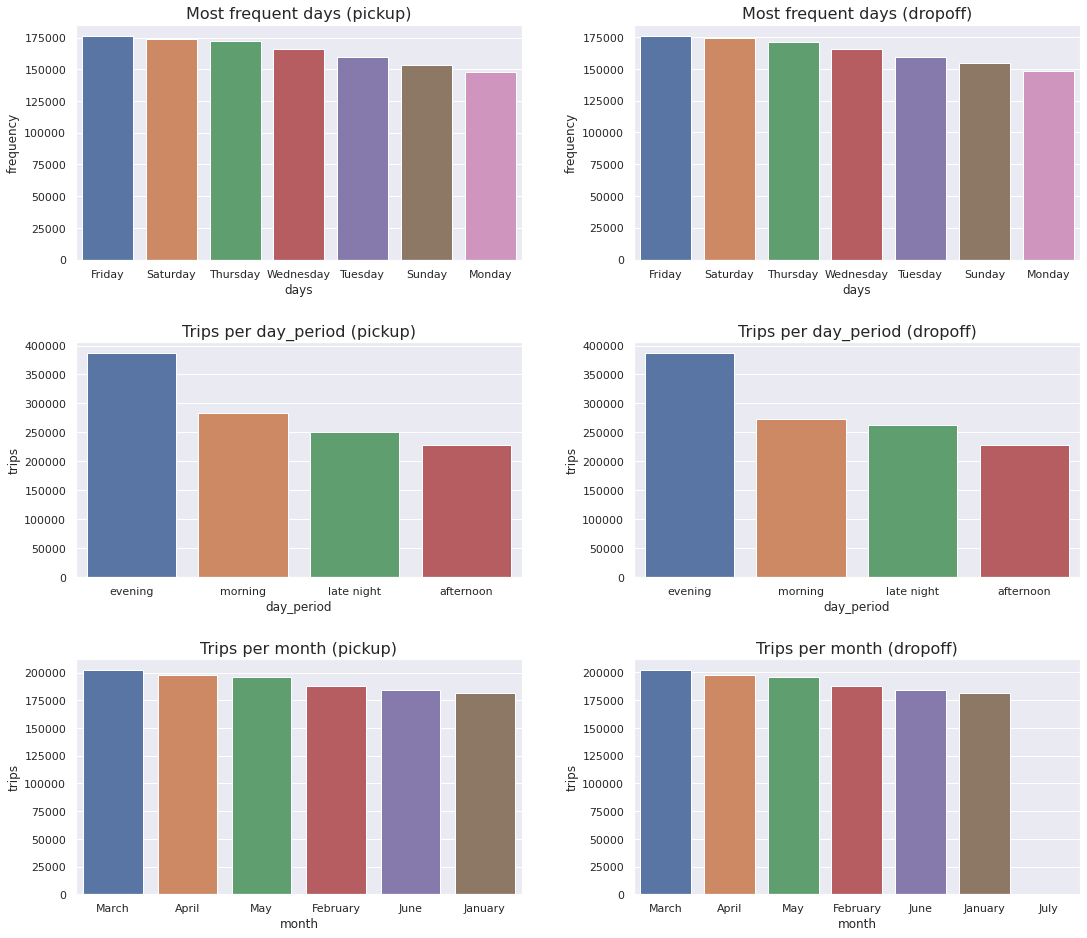

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# plot 1. Most frequent pickup days

y = df_train['pickup_day_name'].value_counts().tolist()

x = df_train['pickup_day_name'].value_counts().index.tolist()

df_graph = pd.DataFrame(data=list(zip(x,y)), columns=['days', 'frequency'])


sns.set(rc={'figure.figsize':(18, 16)})
fig, axis = plt.subplots(3, 2)

fig.subplots_adjust(hspace=0.35, wspace=0.25)

# plot 1

p = sns.barplot(x='days', y='frequency', data=df_graph, ci=None, ax=axis[0,0])
p.set_title('Most frequent days (pickup)', fontsize=16)

# plot 2

y = df_train['dropoff_day_name'].value_counts().tolist()

x = df_train['dropoff_day_name'].value_counts().index.tolist()

df_graph = pd.DataFrame(data=list(zip(x,y)), columns=['days', 'frequency'])

p = sns.barplot(x='days', y='frequency', data=df_graph, ci=None, ax=axis[0,1])
p.set_title('Most frequent days (dropoff)', fontsize=16)

# plot 3

y = df_train['pickup_day_period'].value_counts().tolist()

x = df_train['pickup_day_period'].value_counts().index.tolist()

df_graph = pd.DataFrame(data=list(zip(x,y)), columns=['day_period', 'trips'])

p = sns.barplot(x='day_period', y='trips', data=df_graph, ci=None, ax=axis[1,0])
p.set_title('Trips per day_period (pickup)', fontsize=16)

# plot 4

y = df_train['dropoff_day_period'].value_counts().tolist()

x = df_train['dropoff_day_period'].value_counts().index.tolist()

df_graph = pd.DataFrame(data=list(zip(x,y)), columns=['day_period', 'trips'])

p = sns.barplot(x='day_period', y='trips', data=df_graph, ci=None, ax=axis[1,1])
p.set_title('Trips per day_period (dropoff)', fontsize=16)

# plot 5

y = df_train['pickup_month'].value_counts().tolist()

x = df_train['pickup_month'].value_counts().index.tolist()

df_graph = pd.DataFrame(data=list(zip(x,y)), columns=['month', 'trips'])

p = sns.barplot(x='month', y='trips', data=df_graph, ci=None, ax=axis[2,0])
p.set_title('Trips per month (pickup)', fontsize=16)

# plot 5

y = df_train['dropoff_month'].value_counts().tolist()

x = df_train['dropoff_month'].value_counts().index.tolist()

df_graph = pd.DataFrame(data=list(zip(x,y)), columns=['month', 'trips'])

p = sns.barplot(x='month', y='trips', data=df_graph, ci=None, ax=axis[2,1])
p.set_title('Trips per month (dropoff)', fontsize=16)

### Observations:

We see that most of the trips, during the day, are at afternoon and morning. This can be happening because many people use taxis to go to work at the morning and return at home at evening. 

Also, most busy days are Friday, Saturday and Thursday, because people prefer to hang out these days of the week.

Text(0.5, 1.0, 'Average Trip Duration for each day of week (for pickup) ')

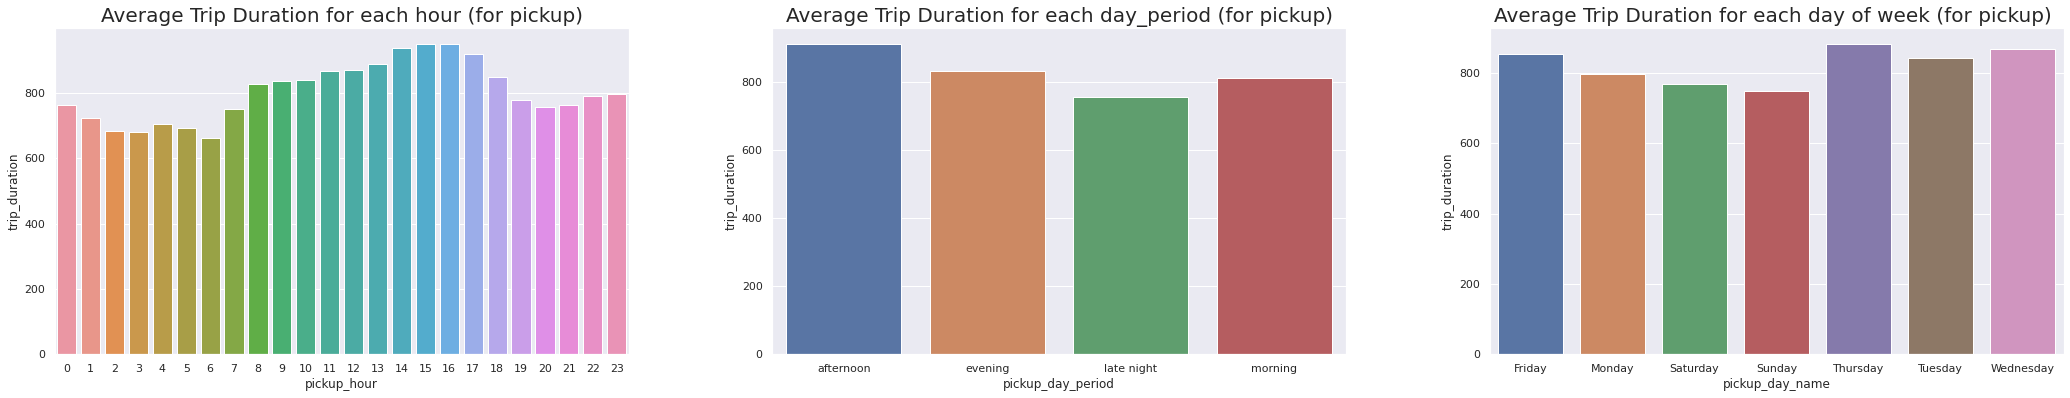

In [ ]:
# plot 1

df_mean = df_train.groupby(['pickup_hour']).mean()

df_mean['pickup_hour'] = df_mean.index

sns.set(rc={'figure.figsize':(36, 6)})
fig, axis = plt.subplots(1, 3)

fig.subplots_adjust(hspace=0.35, wspace=0.25)

sns.set(rc={'figure.figsize':(10, 8)})

p = sns.barplot(x = 'pickup_hour', y = 'trip_duration', data = df_mean, ci = None, ax=axis[0])
p.set_title('Average Trip Duration for each hour (for pickup)', fontsize = 20)

# plot 2

df_mean = df_train.groupby(['pickup_day_period']).mean()

df_mean['pickup_day_period'] = df_mean.index

p = sns.barplot(x = 'pickup_day_period', y = 'trip_duration', data = df_mean, ci = None, ax=axis[1])
p.set_title('Average Trip Duration for each day_period (for pickup)', fontsize = 20)

# plot 3

df_mean = df_train.groupby(['pickup_day_name']).mean()

df_mean['pickup_day_name'] = df_mean.index

p = sns.barplot(x = 'pickup_day_name', y = 'trip_duration', data = df_mean, ci = None, ax=axis[2])
p.set_title('Average Trip Duration for each day of week (for pickup) ', fontsize = 20)

### Observations

The trips with highest duration during the day, are at 13:00 until 17:00, because many people may stop from work or may have a break. So there is a lot of traffic and for that reason the trip durations are the longest of the day. On the other hand, the trips with lowest duration are at 2:00 until 6:00, because most people are sleeping these hours and so there is significantly less traffic on the streets.  

In addition, the trips with highest duration during the week are on Thursday, Wednesday, Friday and Tuesday. The reason, is that on these days most of the people have to go to work and also on Fridays they may want to go out. Thats why on Saturday and Sunday trips have lowest duration.

1.4)

Text(0.5, 1.0, 'trip duration')

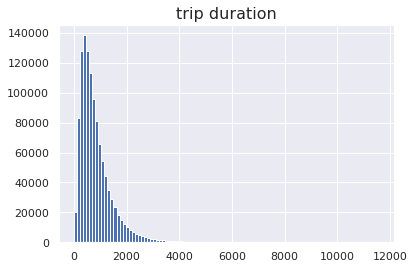

In [ ]:
# exercise 1.4.a

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

out = pd.cut(df_train['trip_duration'], bins=100)
frame = df_train['trip_duration']

hist = frame.hist(bins=100)
hist.set_title('trip duration', fontsize = 16)

Text(0.5, 1.0, 'log trip duration')

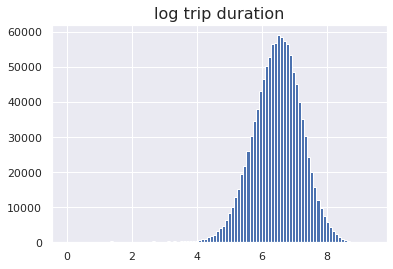

In [ ]:
# exercise 1.4.b

log_dist = np.log(df_target['trip_duration'])

df_target['log_trip_duration'] = log_dist

log_dist = np.log(df_train['trip_duration'])

df_train['log_trip_duration'] = log_dist

hist = log_dist.hist(bins=100)
hist.set_title('log trip duration', fontsize = 16)

1.5)

Text(0.5, 1.0, 'Average Trip Duration for each vendor ')

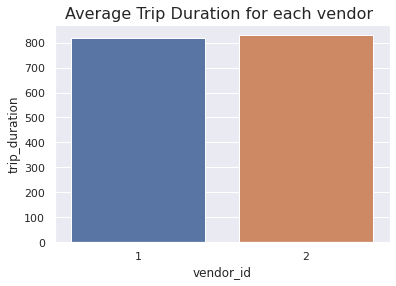

In [ ]:
# exercise 1.5

df_mean = df_train.groupby(['vendor_id']).mean()

df_mean['vendor_id'] = df_mean.index
p = sns.barplot(x = 'vendor_id', y = 'trip_duration', data = df_mean, ci=None)
p.set_title('Average Trip Duration for each vendor ', fontsize = 16)

### Observation

On average both vendors have less or more the same trip duration. So, it does not matter which vendor a customer should use.

1.6)

Text(0.5, 1.0, 'Average Trip Duration for each passenger_count ')

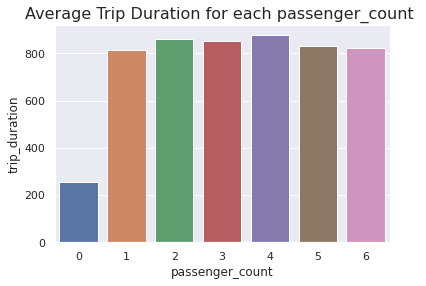

In [ ]:
# exercise 1.6

df_mean = df_train.groupby(['passenger_count']).mean()

df_mean['passenger_count'] = df_mean.index

p = sns.barplot(x = 'passenger_count', y = 'trip_duration', data=df_mean, ci=None)
p.set_title('Average Trip Duration for each passenger_count ', fontsize = 16)

### Observation
Passenger count does not affect trip duration.

1.7)

In [ ]:
#exercise 1.7

# return the manhattan-distance
def manhattan_dist(X1, Y1, X2, Y2):
  manh_dist = []

  for x1, y1, x2, y2 in zip(X1, Y1, X2, Y2):
    mdist = abs(x2-x1) + abs(y2-y1)
    manh_dist.append(mdist)
  
  return manh_dist 

X1 = df_train['pickup_latitude']
Y1 = df_train['pickup_longitude']

X2 = df_train['dropoff_latitude']
Y2 = df_train['dropoff_longitude']

manh_dist = manhattan_dist(X1, Y1, X2, Y2)

# add new column for manhattan distance in training dataframe
df_train['manh_distance'] = manh_dist   


X1 = df_test['pickup_latitude']
Y1 = df_test['pickup_longitude']

X2 = df_test['dropoff_latitude']
Y2 = df_test['dropoff_longitude']

manh_dist = manhattan_dist(X1, Y1, X2, Y2)

# add new column for manhattan distance in test dataframe
df_test['manh_distance'] = manh_dist

Text(0.5, 1.0, 'Average Manh_distance for each day of week')

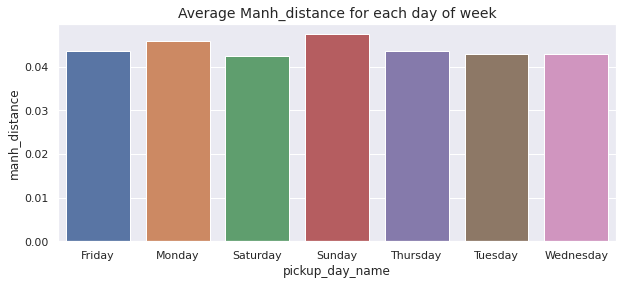

In [ ]:
df_mean = df_train.groupby(['pickup_day_name']).mean()

df_mean['pickup_day_name'] = df_mean.index

sns.set(rc={'figure.figsize':(10, 4)})

p = sns.barplot(x='pickup_day_name', y='manh_distance', data=df_mean, ci=None)
p.set_title('Average Manh_distance for each day of week', fontsize = 14)


There are no noticable differences in the manhattan distance of each day except from Sunday, which is a bit higher. This may happen, because people like to travel on Sundays. 

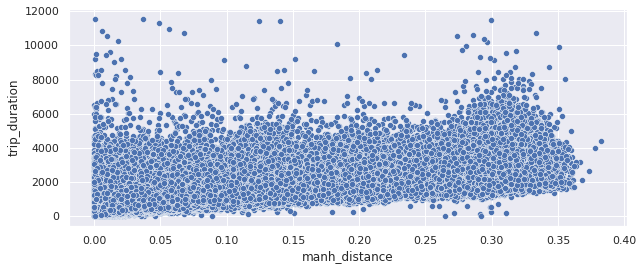

In [ ]:
sns.scatterplot(x='manh_distance', y='trip_duration', data=df_train)

1.8)

In [ ]:
# creates 'average velocity' column
distance = df_train['manh_distance']
time = df_train['trip_duration']

avg_velocity = distance / time

df_train['avg_velocity'] = avg_velocity

df_hour = df_train.groupby(['pickup_hour']).mean()

df_hour['pickup_hour'] = df_hour.index

df_day = df_train.groupby(['pickup_day_name']).mean()

df_day['pickup_day_name'] = df_day.index

df_month = df_train.groupby(['pickup_month']).mean()

df_month['pickup_month'] = df_month.index

Text(0.5, 1.0, 'avg_velocity per pickup_month')

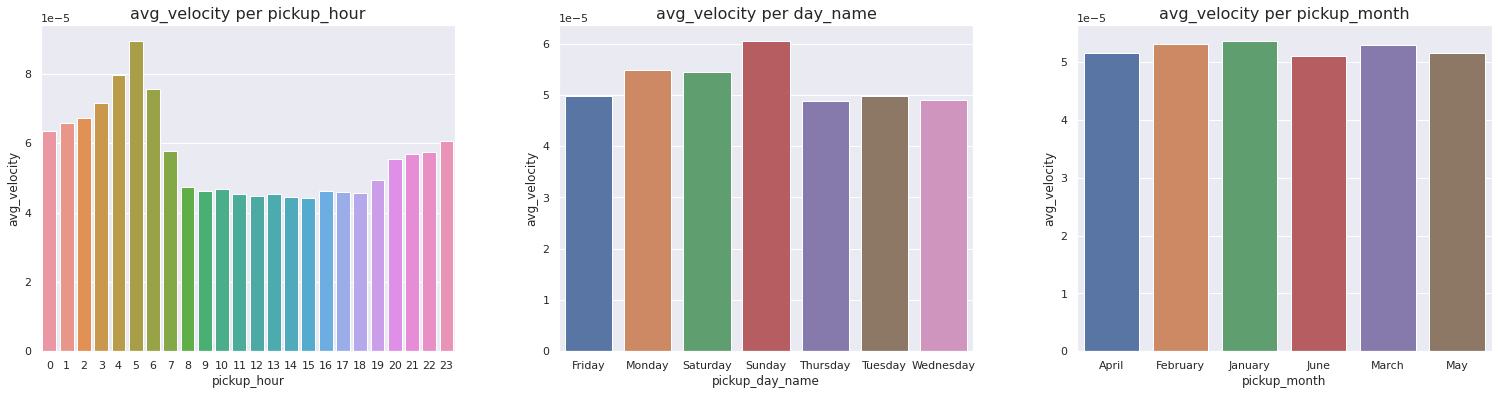

In [ ]:
# plots
fig, axis = plt.subplots(1, 3)
sns.set(rc={'figure.figsize':(26,6)})

fig.subplots_adjust(hspace=0.65, wspace = 0.25)

p = sns.barplot(x = df_hour['pickup_hour'], y = df_hour['avg_velocity'], data=df_hour, ci=None, ax=axis[0])

p.set_title('avg_velocity per pickup_hour', fontsize = 16)

p = sns.barplot(x = df_day['pickup_day_name'], y = df_day['avg_velocity'], data=df_day, ci=None, ax=axis[1])

p.set_title('avg_velocity per day_name', fontsize = 16)

p = sns.barplot(x = df_month['pickup_month'], y = df_month['avg_velocity'], data=df_month, ci=None, ax=axis[2])

p.set_title('avg_velocity per pickup_month', fontsize = 16)

### Observations

From 3:00 to 6:00 the average velocity is higher, because there is no traffic on streets (and no police). On the other hand from 8:00 to 18:00 the average velocity is lower, because these hours, people are more active.

From the above observations, we see that on Sunday the manhattan distances are the highest and the trip durations are the lowest. This may happen because there is less traffic on the streets and for that reason the average velocity is the highest on this day.

1.9)

Text(0.5, 1.0, 'Dropoff points')

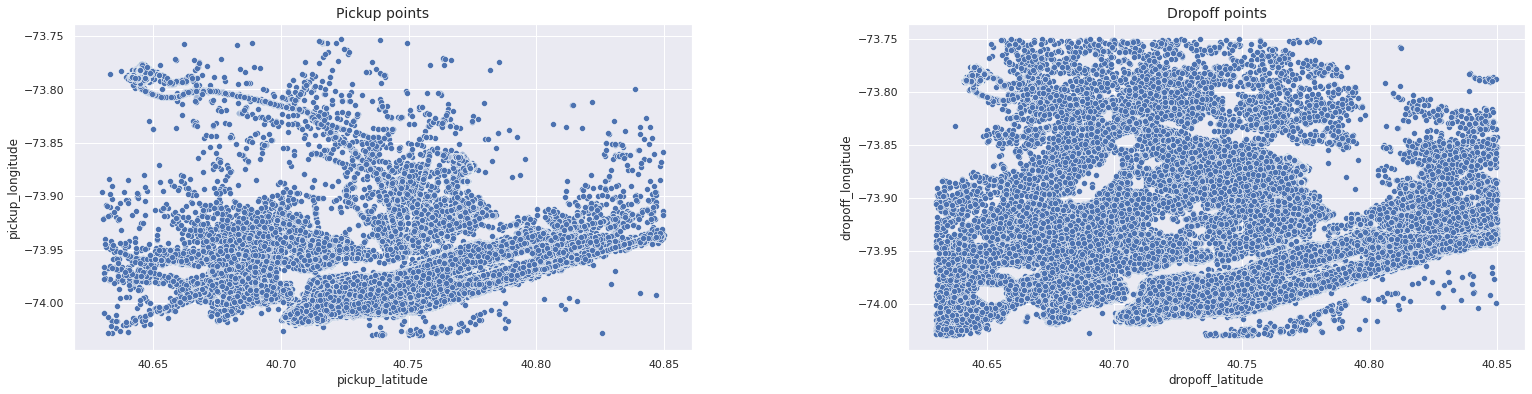

In [ ]:
# exercise 1.9

# plots 
fig, axis = plt.subplots(1,2)

fig.subplots_adjust(hspace=0.35, wspace = 0.35)

p = sns.scatterplot(x = df_train['pickup_latitude'], y = df_train['pickup_longitude'],
data=df_train, ci=None, ax=axis[0])
p.set_title('Pickup points', fontsize = 14)

p = sns.scatterplot(x = df_train['dropoff_latitude'], y = df_train['dropoff_longitude'],
data=df_train, ci=None, ax=axis[1])
p.set_title('Dropoff points', fontsize = 14)

### Observations

We can see that there are many dropoff points which are not appear in the first graph, for example at coordinates [(40.65, -73.85), (40.80, -73.85)]. This may happen because at these area there are only companies and factories.

###Clustering and prediction of log-trip duration - Exercise 2

2.1)

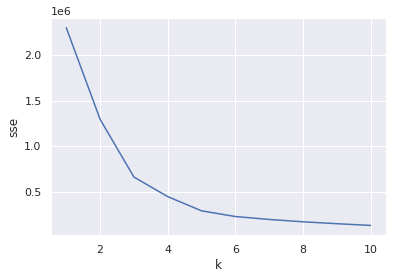

In [ ]:
# exercise 2.1

from sklearn import preprocessing, cluster

starting_points = list(zip(df_train['pickup_latitude'], df_train['pickup_longitude']))

scaler = preprocessing.StandardScaler()     

starting_points_sc = scaler.fit_transform(starting_points)      # scales the data

sse = []

kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}   # arguments for the kmeans cluster 

# apply elbow
for k in range(1,11):
  kmeans = cluster.KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(starting_points_sc)
  sse.append(kmeans.inertia_)

df = pd.DataFrame(data=list(zip(range(1,11), sse)), columns=['k','sse'])

# plot
sns.set(rc={'figure.figsize':(6,4)})
sns.lineplot(x='k', y='sse', data=df, ci=None)

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_

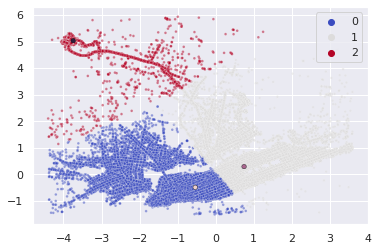

In [ ]:
# creates graph for clusters

from kneed import KneeLocator

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

best_k = kl.elbow   # returns the best k

kmeans = cluster.KMeans(n_clusters=best_k, **kmeans_kwargs)
kmeans.fit(starting_points_sc)

colors = ['red', 'blue', 'purple', 'green']
ax = sns.scatterplot(starting_points_sc[:, 0], starting_points_sc[:, 1], hue=kmeans.labels_, palette=sns.color_palette('coolwarm', as_cmap = True), alpha=0.5, s=7)
ax = sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                     hue=range(best_k), s=20, ec='black', legend=False, ax=ax)

2.2)

In [ ]:
# creates the training set and test set

df_train['pickup_longitude'] = df_train['pickup_longitude']

df_train['pickup_latitude'] = df_train['pickup_latitude']

df_train['dropoff_longitude'] = df_train['dropoff_longitude']

df_train['dropoff_latitude'] = df_train['dropoff_latitude']

X_train = df_train[['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 
                    'dropoff_longitude', 'dropoff_latitude', 'pickup_day_num', 'pickup_month_num', 
                    'pickup_season_num', 'pickup_day_period_num', 'pickup_hour', 'manh_distance']][:500000]

Y_train = df_train['log_trip_duration'][:500000]

df_test['pickup_longitude'] = df_test['pickup_longitude']

df_test['pickup_latitude'] = df_test['pickup_latitude']

df_test['dropoff_longitude'] = df_test['dropoff_longitude']

df_test['dropoff_latitude'] = df_test['dropoff_latitude']

X_test = df_test[['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 
                    'dropoff_longitude', 'dropoff_latitude', 'pickup_day_num', 'pickup_month_num', 
                    'pickup_season_num', 'pickup_day_period_num', 'pickup_hour', 'manh_distance']][:500000]

Y_test = df_target['log_trip_duration'][:500000]

In [ ]:
# finds the importance of each feature
from sklearn.ensemble import RandomForestRegressor

feature_names = [f"{i}" for i in X_train.columns]   # creates a list with the names of features

rfc = RandomForestRegressor(random_state=0)     # creates the model
rfc.fit(X_train, Y_train)                       # train the RandomForestRegressor

importances = rfc.feature_importances_          # returns the importance of features
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

In [ ]:
# calculate and print MAE and MSE
import sklearn.metrics as metrics

y_pred = rfc.predict(X_test)

mae = metrics.mean_absolute_error(Y_test, y_pred)
mse = metrics.mean_squared_error(Y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)

MAE: 0.26612735018021505
MSE: 0.17603667657259958


In [ ]:
print('n_estimators', rfc.n_estimators)
print('max_depth', rfc.max_depth)
print('max_features', rfc.max_features)

n_estimators 50
max_depth 15
max_features auto


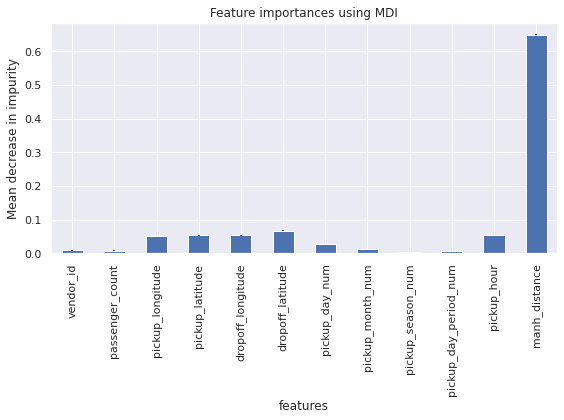

In [ ]:
# make a graph for the importance of features
forest_importances = pd.Series(importances, index=feature_names)

sns.set(rc={'figure.figsize':(8,6)})

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_xlabel("features")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Observation

As we can see the most important feature is the manhattan_distance. Also we see that pickup points, dropoff points, the pickup_hour and the pickup_day are also important but not enough. The rest of the other features are not important, beacause as we saw above their different variants of values do not affect the trip duration. So if we remove the vendor_id, the passenger_count, the pickup_season and the pickup_say_period, the model will not see significant improvement.

In [ ]:
#2.3

# we tried GridSearchCV for varius parameters and we concluded in the below
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [11, 13, 15],
              'max_features': ['sqrt', 'auto'],
              'n_estimators': [30, 40, 50]
              }

grid_search = GridSearchCV(estimator = rfc, param_grid = parameters, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, Y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [11, 13, 15],
                         'max_features': ['sqrt', 'auto'],
                         'n_estimators': [30, 40, 50]},
             verbose=2)

### Note:

We tried a lot of parameters combination in GridSearchCV and we concluded that the best combination is the above.


In [ ]:
# prints the best parameters
grid_search.best_params_

{'max_depth': 15, 'max_features': 'auto', 'n_estimators': 50}

In [ ]:
# holds the best parameters

d = grid_search.best_params_

max_depth = d.get('max_depth')
max_features = d.get('max_features')
n_estimators = d.get('n_estimators')

In [ ]:
# training rfc model with the best parameters
rfc = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)

rfc.fit(X_train, Y_train)

y_pred = rfc.predict(X_test)

In [ ]:
# calculate and print MAE and MSE
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(Y_test, y_pred)
mse = metrics.mean_squared_error(Y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)

MAE: 0.28419995200190107
MSE: 0.18983521419685853


###Bonus

1)

In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# creates the graph

import folium

df_train = pd.read_csv('./data/train.csv')

coordinates = df_train[['pickup_latitude', 'pickup_longitude']]

map = folium.Map(location=[coordinates['pickup_latitude'].mean(), coordinates['pickup_longitude'].mean()], zoom_start=14, control_scale=True)

map

2.a)

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Frequency of vendor_id')

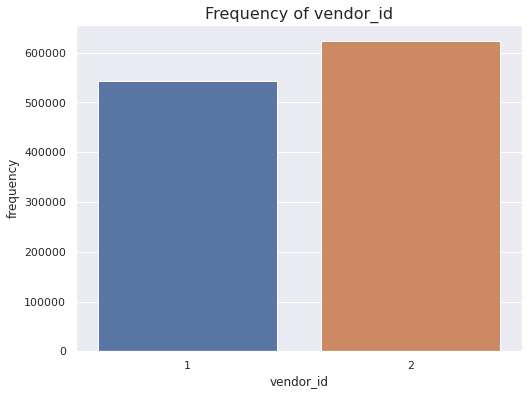

In [ ]:
y = df_train['vendor_id'].value_counts().tolist()
x = df_train['vendor_id'].value_counts().index.tolist()

data = np.array([])

data = np.append(data,x,axis=0)
data = np.append(data,y,axis=0)
print(type(data))

data = [int(i) for i in data]
data = np.array(data).reshape(2,2)
data = np.transpose(data)
df_graph = pd.DataFrame(data=data, columns=['vendor_id', 'frequency'])

sns.set(rc={'figure.figsize':(8,6)})

p = sns.barplot(x='vendor_id', y='frequency', data=df_graph, ci=None)
p.set_title('Frequency of vendor_id', fontsize=16)

### Observation 

The prefered vendor is the one with id = 2.

### Notes 

We ran the program with half the data, because with 100% of data, RAM commits suicide.